## Обучение случайного леса

In [1]:
# импортирую библиотеки

import collections
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import seaborn as sns

# отключение ворнингов
import warnings
warnings.filterwarnings('ignore')

# настройка размеров графиков
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# настройка стиля графиков
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# читаю данные

train = pd.read_csv('data/invasion.csv')
test = pd.read_csv('data/operative_information.csv')

train.head(5)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [3]:
# закодирую целевую переменную

le = LabelEncoder()

train['class'] = train[['class']].apply(le.fit_transform)

In [5]:
train.head(5)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,2,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [6]:
# выведу долю пропусков по столбцам в трейне

train.isnull().mean()

class                 0.0
g_reflection          0.0
i_reflection          0.0
speed                 0.0
brightness            0.0
time_of_observance    0.0
volume                0.0
dtype: float64

In [7]:
# выведу долю пропусков по столбцам в тесте

test.isnull().mean()

g_reflection          0.0
i_reflection          0.0
speed                 0.0
brightness            0.0
time_of_observance    0.0
volume                0.0
dtype: float64

Пропусков нет, категориальных переменных тоже, можно приступать к обучению леса.

In [8]:
# воспроизводимость
rs = np.random.seed(0)

X = train.drop('class', axis=1)
y = train['class']

# гиперпараметры случайного леса

params = {
    'n_estimators':range(10,51,10),
    'max_depth': range(1,13,2),
    'min_samples_split':range(2,10,2),
    'min_samples_leaf':range(1,8)
}

# подбор гиперпараметров

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=params,
    cv=5,
    n_jobs=-1 # использую все ядра
    
)

rf_grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [9]:
clf = rf_grid.best_estimator_
predictions = clf.predict(test)

In [11]:
# посчитаю кол-во спрогноpированных кораблей

predictions = le.inverse_transform(predictions)

print(collections.Counter(predictions))

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})


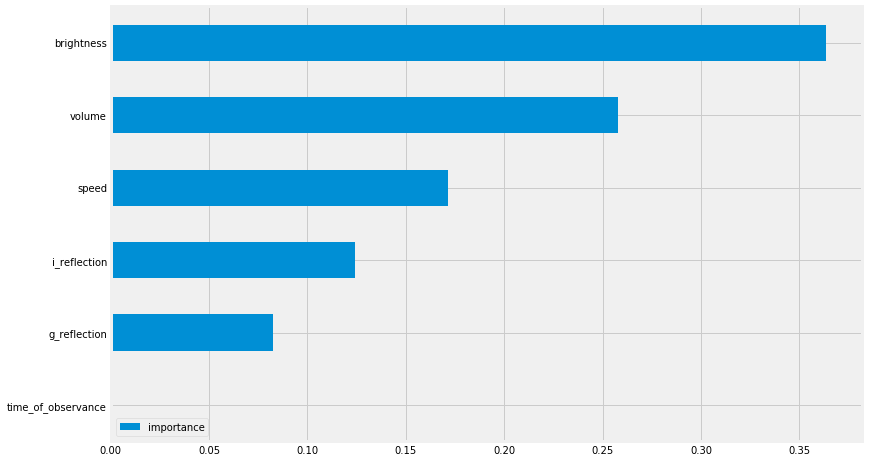

In [12]:
# выведу важность признаков

imp = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));